In [27]:
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from pandas import set_option
from matplotlib import pyplot
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Cargando el archivo de datos 

In [8]:
# Cargando el archivo de datos
url = "https://raw.githubusercontent.com/ricardo-rios/topicos_ciencia_datos/master/parciales/parcial_i/datos.csv"
dataframe = read_csv(url, header=0)
#array = dataframe.values
#X = array[:,0:8]
#Y = array[:,8]

# Análisis descriptivo

In [9]:
peek = dataframe.head()
print(peek)

         X1        X2        X3         X4  Y
0 -0.944699  0.182400 -9.959342   9.948282  1
1 -0.878489 -1.162582  9.606050 -10.356792  0
2  0.986955  1.303747  9.783216  -9.155356  0
3  0.817854  0.990738  9.409722  10.555568  1
4  0.178478 -0.512012  9.733660  -9.196261  0


In [10]:
print(dataframe.shape)

(1000, 5)


In [11]:
types = dataframe.dtypes
print(types)

X1    float64
X2    float64
X3    float64
X4    float64
Y       int64
dtype: object


In [14]:
set_option('display.width' , 100)
set_option('precision' , 3)
description = dataframe.describe()
print(description)

             X1        X2        X3        X4       Y
count  1000.000  1000.000  1000.000  1000.000  1000.0
mean      0.019    -0.003     0.036    -0.058     0.5
std       0.998     0.982    10.079    10.043     0.5
min      -3.526    -3.284   -12.144   -12.768     0.0
25%      -0.653    -0.633   -10.022   -10.052     0.0
50%       0.030     0.005    -0.656     0.824     0.5
75%       0.672     0.662    10.081     9.987     1.0
max       3.526     2.819    12.354    12.570     1.0


In [15]:
class_counts = dataframe.groupby('Y').size()
print(class_counts)

Y
0    500
1    500
dtype: int64


In [17]:
correlations = dataframe.corr(method= 'pearson' )
print(correlations)

       X1     X2     X3     X4      Y
X1  1.000  0.002  0.021  0.018  0.019
X2  0.002  1.000  0.061  0.025  0.024
X3  0.021  0.061  1.000 -0.005  0.003
X4  0.018  0.025 -0.005  1.000  0.996
Y   0.019  0.024  0.003  0.996  1.000


In [18]:
skew = dataframe.skew()
print(skew)

X1   -0.009
X2   -0.128
X3    0.011
X4   -0.002
Y     0.000
dtype: float64


# Visualizando los datos

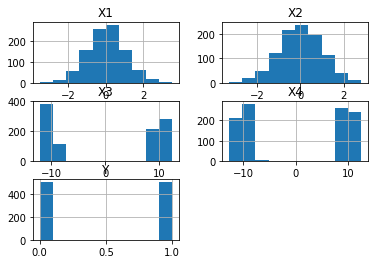

In [20]:
dataframe.hist()
pyplot.show()

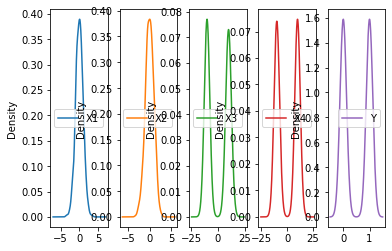

In [22]:
dataframe.plot(kind='density', subplots=True, layout=(1, 5), sharex=False)
pyplot.show()

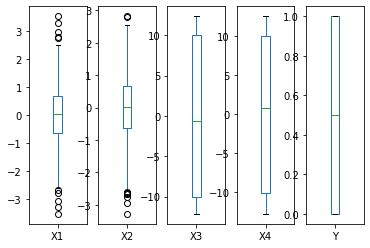

In [23]:
dataframe.plot(kind='box', subplots=True, layout=(1,5), sharey=False)
pyplot.show()

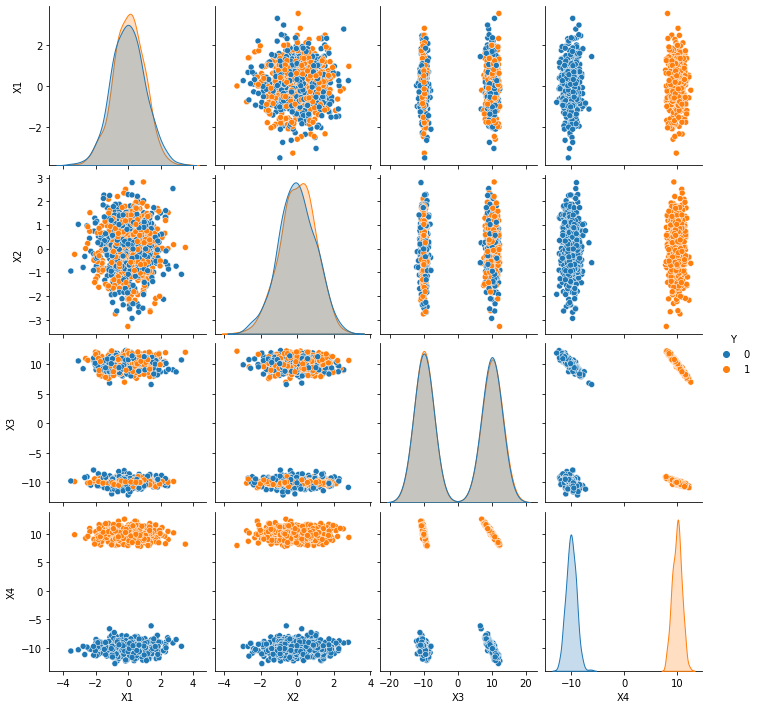

In [25]:
sns.pairplot(dataframe, hue = 'Y')

# Desarrollar una estrategia de selección de variables.
Del gráfico anterior se observa que la variable X4 por si sola tiene un gran poder discriminador , tambien en menor medida X3 tiene la capacidad de discriminar entre las dos clases de la variable respuesta. Por último, X1 y X2 no estan asociadas con la variable respuesta. Vamos a utilizar las variables X3 y X4. 

In [26]:
# Extraemos las columnas correspondientos a las variables X3 y X4.
array = dataframe.values
X = array[:,[2,3]]
Y = array[:,4]

# Creando el Pipeline

In [28]:
# create pipeline
estimators = []
estimators.append(('standardize', StandardScaler()))
estimators.append(('knn', KNeighborsClassifier()))
model = Pipeline(estimators)

In [29]:
# evaluate pipeline
kfold = KFold(n_splits=10, random_state=7, shuffle=True)
results = cross_val_score(model, X, Y, cv=kfold)
print(results.mean())


1.0
